We will be using two tools:

Hierarchical Clustering 
K-Means Clustering 
Then we will group people based on how they use their credit cards, so the company can decide how to treat each group differently (like VIPs vs cautious spenders vs impulsive users).

In [1]:
import pandas as pd
df = pd.read_csv("credit_card_dataset.csv")
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [2]:
df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [3]:
df.describe()  


,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [4]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [5]:
df.drop('CUST_ID', axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)

In [6]:
df.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

This imports the StandardScaler class from sklearn, which is used to standardize features by removing the mean and scaling to unit variance (i.e., making the data have mean = 0 and standard deviation = 1).
Creates an instance of the StandardScaler.

scaler.fit_transform(df):
fit(): calculates the mean and standard deviation for each column.
transform(): applies the standardization to each value:
pd.DataFrame(...): wraps the result back into a pandas DataFrame.
columns=df.columns: keeps the original column names so you don’t lose context.

K-Means (and other ML models) work better when data is on the same scale. This avoids features with large values dominating the clustering process.

1️⃣ Standardize the Data

Before clustering, we need all features to be on the same scale.
Why? Because CREDIT_LIMIT might be in the thousands, and PURCHASES might be in hundreds — and clustering would wrongly prioritize big numbers.
StandardScaler transforms all values so their average is 0 and their spread (standard deviation) is 1 — this makes clustering fair!

2️⃣ Agglomerative Clustering

Select the two features we want to cluster on
X = scaled_df[['PURCHASES', 'CREDIT_LIMIT']]

Create an Agglomerative Clustering model
agglo = AgglomerativeClustering(n_clusters=4)

Fit the model and assign clusters to each data point
clusters = agglo.fit_predict(X)

Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['PURCHASES'], y=X['CREDIT_LIMIT'], hue=clusters, palette='Set1', s=100)
plt.title("Hierarchical Clustering")
plt.grid(True)
plt.show()

✅ Explanation:

We use AgglomerativeClustering, which starts with each customer as their own cluster and merges the most similar ones until we have 4.
fit_predict(X) assigns each customer to a cluster (numbered 0–3).
sns.scatterplot gives us a colorful 2D map of how customers group based on their spending (PURCHASES) and credit access (CREDIT_LIMIT).

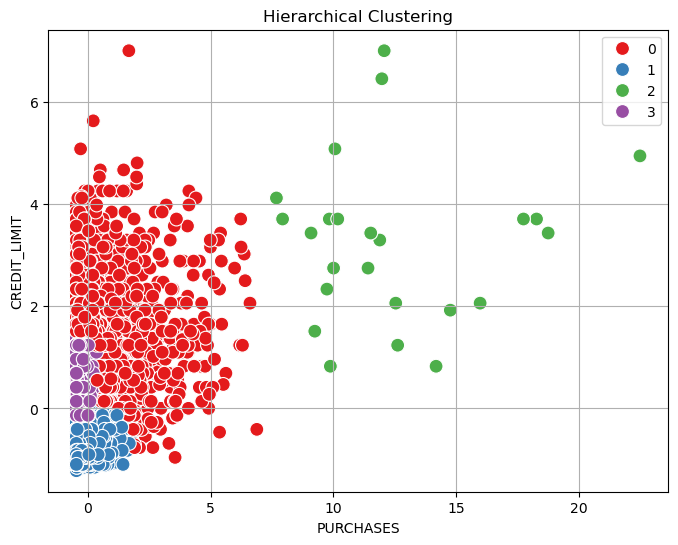

In [8]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

X = scaled_df[['PURCHASES', 'CREDIT_LIMIT']]

# Build the model
agglo = AgglomerativeClustering(n_clusters=4)
clusters = agglo.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['PURCHASES'], y=X['CREDIT_LIMIT'], hue=clusters, palette='Set1', s=100)
plt.title("Hierarchical Clustering")
plt.grid(True)
plt.show()

Hierarchical Clustering with AgglomerativeClustering 
We’re applying hierarchical clustering (specifically, agglomerative/bottom-up) on two selected features: **PURCHASES** and **CREDIT_LIMIT**. This helps group customers into similar behavior clusters.


➡️ We import the AgglomerativeClustering model from sklearn.cluster. This algorithm starts with each point as its own cluster and merges the closest pairs step-by-step until the desired number of clusters is reached.
➡️ We extract only two features (PURCHASES and CREDIT_LIMIT) from the scaled dataset. Using just two features makes it easier to visualize the clusters in 2D.
➡️ Here we create an instance of the Agglomerative Clustering model.

n_clusters=4 tells the algorithm to group the data into 4 clusters.
➡️ This line does two things:

.fit() applies the clustering model to the selected data (X).

.predict() returns an array of cluster labels (like [0, 2, 1, 3, ...]), one for each row in the dataset.
➡️ Creates a blank figure with a size of 8x6 inches—just to make the plot larger and easier to read.
➡️ Draws the scatter plot:

Each dot is a customer.
Dot position is based on PURCHASES and CREDIT_LIMIT.
Color (hue=clusters) indicates which cluster they belong to.
palette='Set1' makes the colors distinct.
s=100 makes the dots nice and big.

What we Get:
4 clusters of customers grouped by similar purchasing and credit behavior.
A clear visual understanding of how different customer groups behave.
A strong base for customer segmentation, personalized marketing, or financial risk assessment.

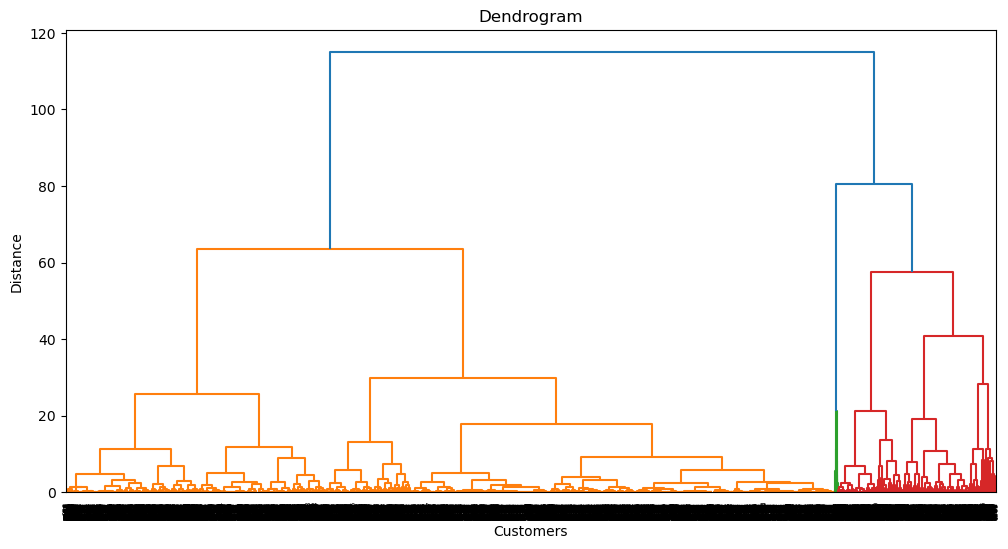

In [9]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

3️⃣ Dendrogram (Optional but Insightful)

A dendrogram is like a tree diagram that shows how data points are merged into clusters step by step.
ward method merges clusters by minimizing variance.
Cutting the dendrogram at a certain height gives you the number of clusters you want.
The bigger the vertical jumps, the more different the clusters were when merged.

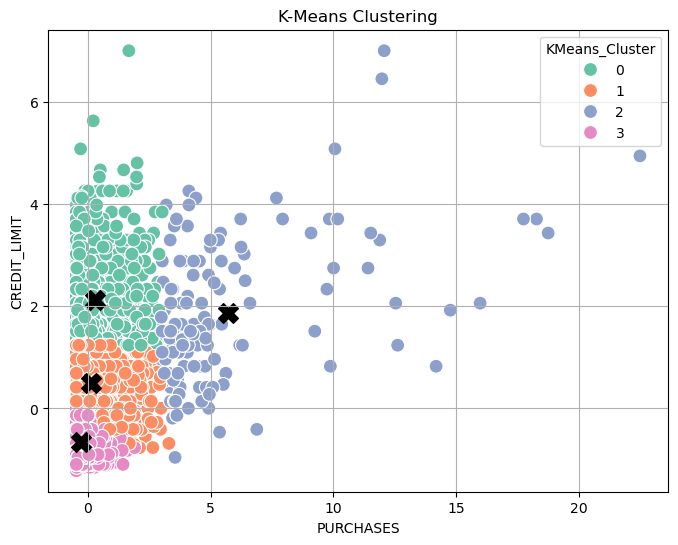

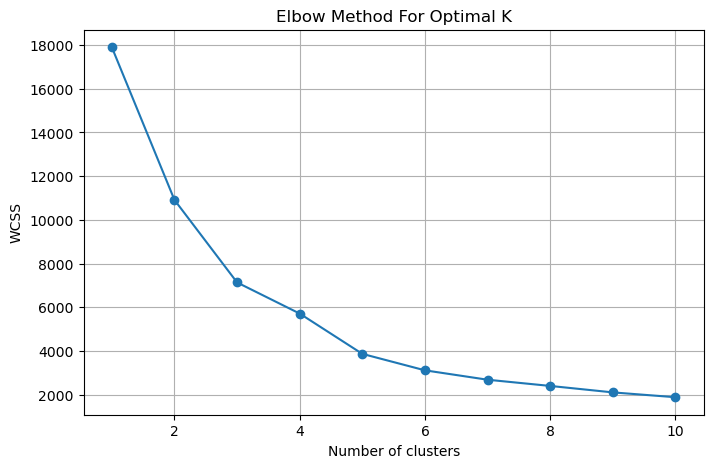

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
scaled_df['KMeans_Cluster'] = kmeans.fit_predict(X)

# Plot results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['PURCHASES'], y=X['CREDIT_LIMIT'], hue=scaled_df['KMeans_Cluster'], palette='Set2', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200)
plt.title("K-Means Clustering")
plt.grid(True)
plt.show()

wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()




✅ Summary:

We standardized our features so that clustering wouldn't be biased by scale.
We used Agglomerative Clustering to group similar customers based on purchases and credit limits.
We plotted clusters to see how customer groups behave visually.
We used a dendrogram to understand the cluster merging process in a deeper way.

These Clusters Mean:

1. **Low Credit, Low Purchases**  
   - 🐢 Careful spenders with low credit  
   - 📣 Strategy: Offer small incentives, raise limits slowly  

2. **High Credit, High Purchases**  
   - 🦅 Premium users, VIP zone  
   - 👑 Strategy: Exclusive rewards, loyalty upgrades  

3. **High Credit, Low Purchases**  
   - 🧊 Wealthy but not using the card  
   - 💌 Strategy: Encourage usage with benefits  

4. **Low Credit, High Purchases**  
   - 🔥 Risky users, possibly overextending  
   - 🛑 Strategy: Monitor closely, suggest budgeting tools


# unscaled data 


In [13]:
from ydata_profiling import ProfileReport  
profile = ProfileReport(df, explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
df.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

In [15]:
df[df["PAYMENTS"]==0]

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
3,0.636364,1499.00,0.0,7500.0,205.788017
45,1.000000,437.00,0.0,2400.0,184.648692
47,1.000000,0.00,0.0,4200.0,1980.873201
55,1.000000,1283.90,0.0,6000.0,0.000000
56,1.000000,313.27,0.0,4000.0,668.468743
...,...,...,...,...,...
8854,0.125000,45.00,0.0,500.0,0.000000
8919,0.333333,152.00,0.0,1500.0,0.000000
8929,0.333333,0.00,0.0,1500.0,1465.407927
8935,1.000000,465.90,0.0,1500.0,0.000000


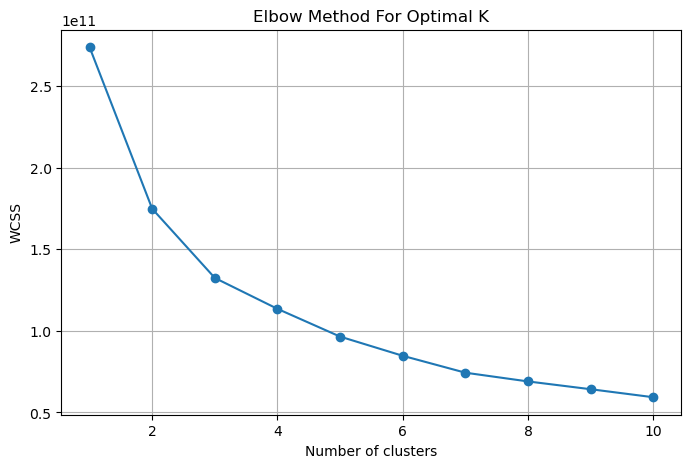

In [16]:
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

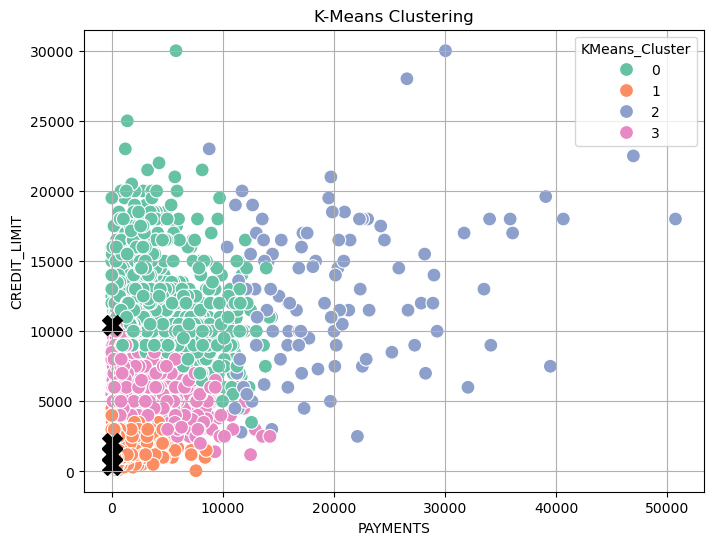

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Plot results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PAYMENTS'], y=df['CREDIT_LIMIT'], hue=df['KMeans_Cluster'], palette='Set2', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200)
plt.title("K-Means Clustering")
plt.grid(True)
plt.show()